#Primer Parcial
<strong>Estudiante:</strong> Luis Fernando Romero Taboada<br>
<strong>CU:</strong> 35-5328<br>
<strong>Carrera:</strong>Ingenieria de Sistemas

<strong>Dataset:</strong> https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india

##Montamos el Google Drive

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ya que el Dataset no contaba con clasificacion, agregamos la columna clasificacion que cuenta con las clases del 0 al 4, un total de 5 clases cada uno va dirigido a un rango de precios de las casas

In [172]:
import numpy as np
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("/content/drive/MyDrive/datasets/MisDatasets/House_Price_India.csv")

dataset.head()

## verificamos el precio mas alto y mas bajo de las casas
print(dataset['Price'].max(), dataset['Price'].min())

# Filtrar el dataset para obtener solo las casas con precios en el rango
rango_razonable = dataset[(dataset['Price'] >= 78000) & (dataset['Price'] <= 300000)]
rango_moderado = dataset[(dataset['Price'] >= 300001) & (dataset['Price'] <= 400000)]
rango_alto = dataset[(dataset['Price'] >= 400001) & (dataset['Price'] <= 525000)]
rango_muyalto = dataset[(dataset['Price'] >= 525001) & (dataset['Price'] <= 725000)]
rango_lujoextremo = dataset[(dataset['Price'] >= 725001) & (dataset['Price'] <= 7700000)]

# Contar cuántos datos están en ese rango
cantidad_razonable = rango_razonable.shape[0]
cantidad_moderado = rango_moderado.shape[0]
cantidad_alto = rango_alto.shape[0]
cantidad_muyalto = rango_muyalto.shape[0]
cantidad_lujoextremo = rango_lujoextremo.shape[0]

print(f'Cantidad de casas en el rango de 78000 a 300000: {cantidad_razonable}')
print(f'Cantidad de casas en el rango de 300001 a 400000: {cantidad_moderado}')
print(f'Cantidad de casas en el rango de 400001 a 525000: {cantidad_alto}')
print(f'Cantidad de casas en el rango de 525001 a 725000: {cantidad_muyalto}')
print(f'Cantidad de casas en el rango de 725001 a 7700000: {cantidad_lujoextremo}')

# Agregamos una columna para definir las clases segun un rango de precio, lambda define una funcion anonima
dataset["Clasificacion"] = dataset['Price'].apply(lambda x: 0 if x in range(78000, 300001)
                                                            else 1 if x in range(300001, 400001)
                                                            else 2 if x in range(400001, 525001)
                                                            else 3 if x in range(525001, 725001)
                                                            else 4)

# Creamos una copia del dataset ya incorporado la columna
data = dataset.copy()
data

7700000 78000
Cantidad de casas en el rango de 78000 a 300000: 3113
Cantidad de casas en el rango de 300001 a 400000: 2875
Cantidad de casas en el rango de 400001 a 525000: 2987
Cantidad de casas en el rango de 525001 a 725000: 2946
Cantidad de casas en el rango de 725001 a 7700000: 2699


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,4
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,4
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,4
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,4
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,122066,52.6191,-114.472,2250,17286,3,76,221700,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,122072,52.5075,-114.393,1540,7480,3,59,219200,0
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,122056,52.7289,-114.507,1130,6120,2,64,209000,0
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,122042,52.7157,-114.411,1420,6631,3,54,205000,0


## 1. Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

In [173]:
# Generar atributo tipo caracter ficticio
data['Tipo de Escuela'] = data['Number of schools nearby'].apply(lambda x: 'A' if x == 1
                                                          else 'B' if x == 2
                                                          else 'C')

# Generar atributo de texto ficticio
data['Estado neutral'] = data['condition of the house'].apply(lambda x: 'Muy deteriorado' if x == 1
                                                              else 'Deteriorado' if x == 2
                                                              else 'Regular' if x == 3
                                                              else 'Buen estado' if x == 4
                                                              else 'Excelente estado')

# Generar valores Booleanos
data['Cerca del Aeropuerto'] = data['Distance from the airport'].apply(lambda x: 1 if x in range(50,66) else 0)

data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,-114.557,2880,5400,2,58,2380000,4,B,Excelente estado,1
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,-114.470,2470,4000,2,51,1400000,4,B,Excelente estado,1
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,-114.468,2940,6600,1,53,1200000,4,A,Regular,1
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,-114.321,3350,42847,3,76,838000,4,C,Regular,0
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,-114.485,2060,4500,1,51,805000,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,-114.472,2250,17286,3,76,221700,0,C,Buen estado,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,-114.393,1540,7480,3,59,219200,0,C,Buen estado,1
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,-114.507,1130,6120,2,64,209000,0,B,Regular,1
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,-114.411,1420,6631,3,54,205000,0,C,Buen estado,1


##2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [174]:
# Duplicar el dataset con variaciones mínimas en los valores de los píxeles
data_duplicado = data.copy()
print('Dataset original')
print(data_duplicado.shape)

# generar matriz de numeros aleatorios con distribucion normal, con media de 0 y desviacion estandar 0.05
data_duplicado.iloc[:, :23] += np.random.normal(0, 0.05, size=(data_duplicado.shape[0], 23))

# Concatenar el dataset original y duplicado
synthetic_dataset = pd.concat([data, data_duplicado], ignore_index=True) # reorganizar el dataframe para no tener indices repetidos

print('Datos del Dataset sintetico')
print(synthetic_dataset.shape)
synthetic_dataset


Dataset original
(14620, 27)
Datos del Dataset sintetico
(29240, 27)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,B,Excelente estado,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,B,Excelente estado,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,A,Regular,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,C,Regular,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.034276,2.010126,1.582569,1555.990163,20000.009869,0.970879,0.058794,0.016601,4.027194,...,-114.523295,2250.000079,17286.025342,2.938960,76.027957,2.217001e+05,0,C,Buen estado,0
29236,6.762830e+09,42733.905083,3.036919,1.921281,1679.941517,6999.931488,1.596693,0.058616,0.025654,3.982549,...,-114.371027,1539.991768,7480.014902,3.116136,59.039011,2.192000e+05,0,C,Buen estado,1
29237,6.762831e+09,42733.930337,1.970385,1.049112,1069.957732,6120.035687,0.955481,0.088782,0.014335,2.929060,...,-114.534877,1129.929763,6120.018515,1.949419,63.979088,2.089999e+05,0,B,Regular,1
29238,6.762831e+09,42734.112803,3.991429,1.096489,1029.955089,6620.972407,0.990254,-0.059638,0.031138,4.061363,...,-114.461979,1420.033277,6631.009589,2.962514,53.988684,2.050000e+05,0,C,Buen estado,1


In [175]:
# Guardamos el dataset sintetico en nuestro almacenamiento

synthetic_dataset.to_csv('/content/drive/MyDrive/datasets/MisDatasets/House_Price_India_synthetic.csv', index=False)

##3. Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

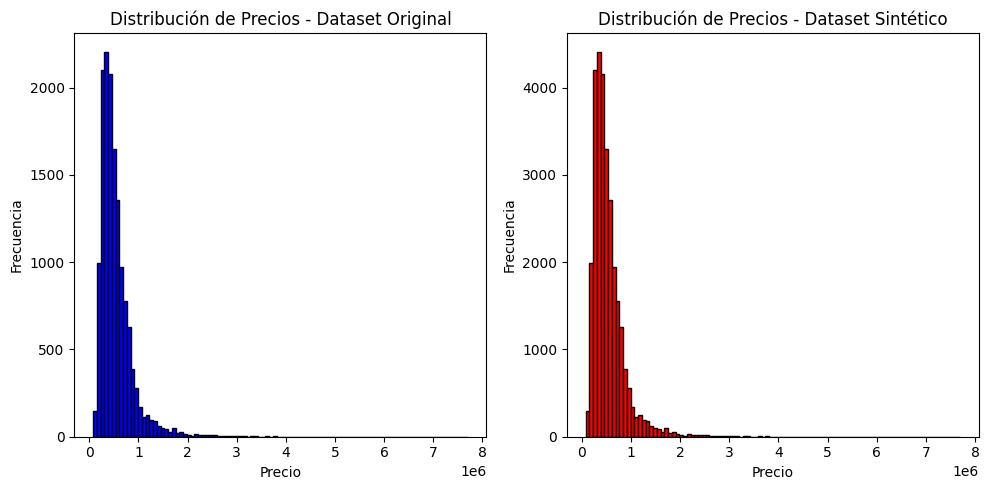

In [176]:
import matplotlib.pyplot as plt

# Configuración para visualización
plt.figure(figsize=(10, 5))

# Gráfico del dataset original
plt.subplot(1, 2, 1)
plt.hist(data['Price'], bins=100, color='blue', edgecolor='black') #histograma con 100 numeros de intervalo
plt.title('Distribución de Precios - Dataset Original')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Gráfico del dataset sintético
plt.subplot(1, 2, 2)
plt.hist(synthetic_dataset['Price'], bins=100, color='red', edgecolor='black')
plt.title('Distribución de Precios - Dataset Sintético')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.tight_layout() # ajusta automaticamente el diseño de la grafica para que no se superpongan
plt.show()


In [177]:
# Convertir 'Tipo de Escuela' a números únicos
# 'astype('category')' convierte la columna a un tipo categórico,
# y 'cat.codes' convierte las categorías a códigos numéricos únicos.
synthetic_dataset['Tipo de Escuela'] = synthetic_dataset['Tipo de Escuela'].astype('category').cat.codes
synthetic_dataset['Estado neutral'] = synthetic_dataset['Estado neutral'].astype('category').cat.codes

synthetic_dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,1,2,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,1,2,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,0,4,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,2,4,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.034276,2.010126,1.582569,1555.990163,20000.009869,0.970879,0.058794,0.016601,4.027194,...,-114.523295,2250.000079,17286.025342,2.938960,76.027957,2.217001e+05,0,2,0,0
29236,6.762830e+09,42733.905083,3.036919,1.921281,1679.941517,6999.931488,1.596693,0.058616,0.025654,3.982549,...,-114.371027,1539.991768,7480.014902,3.116136,59.039011,2.192000e+05,0,2,0,1
29237,6.762831e+09,42733.930337,1.970385,1.049112,1069.957732,6120.035687,0.955481,0.088782,0.014335,2.929060,...,-114.534877,1129.929763,6120.018515,1.949419,63.979088,2.089999e+05,0,1,4,1
29238,6.762831e+09,42734.112803,3.991429,1.096489,1029.955089,6620.972407,0.990254,-0.059638,0.031138,4.061363,...,-114.461979,1420.033277,6631.009589,2.962514,53.988684,2.050000e+05,0,2,0,1


##4. Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [178]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
train_data, test_data = train_test_split(synthetic_dataset, test_size=0.2, random_state=42)
print(f'Datos de entrenamiento: {train_data.shape}')
print(f'Datos de prueba: {test_data.shape}')

# Dividimos los datos para X_test y y_test donde se utilizaran los datos para las pruebas
X_test = test_data.iloc[:, np.r_[2:23,24:27]]
y_test = test_data.iloc[:, 23]
# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, np.r_[2:23,24:27]]
y_train = train_data.iloc[:, 23]

m = y_train.size

Datos de entrenamiento: (23392, 27)
Datos de prueba: (5848, 27)


##5. Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [179]:
def datasetsCreate(y):
    data = {}
    # Convertir la Serie en un DataFrame y asignar un nombre de columna
    y = y.to_frame(name='Clasificacion')
    for i in range(5):
        # Crear un nuevo DataFrame basado en la condición de la clase actual
        data_modified = y.copy()  # Copiar el DataFrame original
        data_modified['Clasificacion'] = np.where(y['Clasificacion'] == i, 1, 0)  # Reemplazar valores
        data[f'data_{i}'] = data_modified  # Almacenar el DataFrame en el diccionario con una clave adecuada

    # Retornar los 5 DataFrames
    return data['data_0'], data['data_1'], data['data_2'], data['data_3'], data['data_4']

In [180]:
y1_train, y2_train, y3_train, y4_train, y5_train = datasetsCreate(y_train)

## Para la clase 0: y = 1, caso contrario: y = 0

In [181]:
concat1 = pd.concat([y1_train, y_train], axis=1) # concatenacion horizontal
concat1

,Clasificacion,Clasificacion
16640,0,1
26583,1,0
19669,0,1
7497,1,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 1: y = 1, caso contrario: y = 0

In [182]:
concat2 = pd.concat([y2_train, y_train], axis=1)
concat2

,Clasificacion,Clasificacion
16640,1,1
26583,0,0
19669,1,1
7497,0,0
11624,0,4
...,...,...
21575,1,1
5390,0,4
860,0,2
15795,1,1


##Para la clase 2: y = 1, caso contrario: y = 0

In [183]:
concat3 = pd.concat([y3_train, y_train], axis=1)
concat3

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,1,2
15795,0,1


##Para la clase 3: y = 1, caso contrario: y = 0

In [184]:
concat4 = pd.concat([y4_train, y_train], axis=1)
concat4

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 4: y = 1, caso contrario: y = 0

In [185]:
concat5 = pd.concat([y5_train, y_train], axis=1)
concat5

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,1,4
...,...,...
21575,0,1
5390,1,4
860,0,2
15795,0,1


In [186]:
y1_test, y2_test, y3_test, y4_test, y5_test = datasetsCreate(y_test)
y1_test

,Clasificacion
13599,0
963,0
25666,0
1412,0
15962,0
...,...
11876,1
5503,0
16196,0
1809,0


#Realizamos la regresion logistica

##<li>Calcular la funcion sigmoidea</li>

In [187]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [188]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [189]:
# llama featureNormalize con los datos cargados
X_train_norm, mu, sigma = featureNormalize(X_train)
X_train_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
16640,0.671886,-0.491834,0.102108,-0.198435,-0.960810,-0.230953,-0.373170,2.318523,-0.536642,-0.839514,...,0.031167,-0.616666,-0.576962,-0.268817,1.191700,0.338072,-0.444985,1.211579,-0.425885,-1.033566
26583,-0.400179,-1.489224,-0.813614,-0.204074,0.065338,0.156959,-0.419993,-0.607613,-1.442520,-0.554035,...,-0.325960,0.294752,-1.137112,-0.210716,1.160656,-1.234705,-0.911751,1.211579,0.715796,0.967524
19669,-0.394398,-1.500162,-1.164849,-0.154924,-0.950453,0.657543,-0.317435,0.948577,-0.619536,-0.946664,...,0.415628,0.744350,-1.108517,-0.201383,1.239670,-1.000784,-0.538312,1.211579,-1.567567,0.967524
7497,0.650126,0.474466,-0.259997,-0.228596,0.921803,-0.082911,-0.306535,0.857384,-0.585637,0.064577,...,-1.499857,1.256260,-0.203606,-0.242257,1.210992,0.229282,-0.668969,1.211579,-1.567567,-1.033566
11624,-0.402861,0.474466,0.644960,0.216406,-0.931077,-0.082911,4.859558,-0.647307,1.105315,0.326296,...,1.391616,-1.095357,0.615009,0.284738,1.210992,0.564898,1.218892,1.211579,0.715796,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.556251,-0.493410,-1.175524,-0.205648,0.023435,-0.338331,-0.308304,0.890921,-1.408444,-0.958628,...,1.216211,-0.500058,-1.036583,-0.213049,1.141277,-0.662192,-0.631638,1.211579,-1.567567,0.967524
5390,-0.402861,0.151302,1.241167,4.011739,0.921803,-0.082911,-0.306535,0.857384,1.950791,1.741957,...,-0.302102,0.155648,1.749581,-0.183378,-0.013085,-1.448796,0.554941,-0.013300,-1.567567,0.967524
860,-1.455848,0.474466,-0.845558,-0.355144,0.921803,-0.082911,-0.306535,-0.647307,0.259839,-0.768165,...,0.340682,-0.651011,-0.979136,-0.431572,-1.237162,-0.441949,-0.111677,-1.238180,0.715796,0.967524
15795,0.596794,0.950686,-0.323806,-0.251467,-0.964747,-0.235469,-0.236186,-0.588854,-0.565245,-0.899032,...,-0.384468,-0.248869,-0.261163,-0.224716,-1.220177,1.013095,-0.526313,-1.238180,0.715796,-1.033566


##Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [190]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

In [191]:
print(X_ready.shape)

(23392, 25)


## Funcion para calcular los costos
Se utiliza para calcular el costo o la función de pérdida en un modelo de regresión logística

In [192]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T)) # Predecir las probabilidades usando la función sigmoide
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) # Calcular el costo

    return J

##Funcion para calcular el descenso de gradiente
Este algoritmo minimiza la función de costo ajustando los valores de theta


In [193]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T)) # Calcula la hipótesis h utilizando la función sigmoid
        theta = theta - (alpha / m) * (h - y).dot(X) # Actualiza theta usando la regla de actualización del descenso por el gradiente

        J_history.append(calcularCosto(theta, X, y)) # Calcula el costo con los parámetros actuales y lo añade al historial
    return theta, J_history

##Realizamos pruebas para y1_train

In [194]:
y1_train = y1_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.39636844 -0.0471867  -0.17174366 -0.18031435 -0.07074057 -0.17339176
 -0.02247684 -0.09344069 -0.0930289  -0.29629331 -0.12987592 -0.13343592
  0.05829205 -0.03330939  0.29806607 -0.70798998  0.01834201 -0.2180216
 -0.05773436  0.00486164  0.00221433 -0.40292991  0.00457659  0.01557814
  0.01030048]


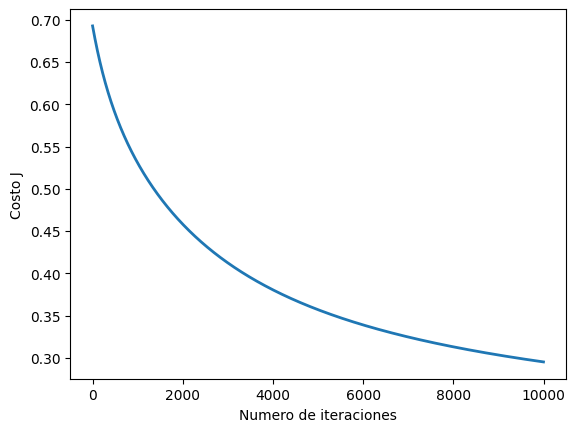

In [195]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X_ready, y1_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#Realizamos pruebas

In [196]:
# Normalizamos X_test
X_test_norm = (X_test - mu) / sigma
m_test = X_test.shape[0]
X_test_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
13599,-1.455848,0.151302,-0.760385,-0.362435,2.774683,-0.082911,-0.306535,-0.647307,-0.585637,-0.554031,...,0.791684,0.634175,-0.749349,-0.439816,-1.237162,-1.225052,-0.205003,-1.238180,0.715796,0.967524
963,-1.455848,-1.464518,-1.420472,-0.289575,-0.931077,-0.082911,-0.306535,2.362076,-2.276589,-1.232121,...,0.935696,-1.026996,-0.835519,-0.297052,1.210992,-1.672540,-0.342326,1.211579,-0.425885,0.967524
25666,0.579874,0.497704,0.942982,-0.233318,1.075965,1.140507,-0.338491,-0.664907,0.199723,1.408804,...,-1.838612,-0.195886,0.844885,-0.239807,-1.292310,1.343905,-0.444985,-1.238180,0.715796,-1.033566
1412,0.650126,2.090285,1.124055,-0.144668,1.848243,-0.082911,-0.306535,-0.647307,1.950791,1.611097,...,-0.002839,-0.049435,0.571924,-0.122632,1.210992,1.571745,2.234818,1.211579,0.715796,-1.033566
15962,-0.415333,-0.506189,-0.856150,-0.326818,-0.974900,0.174674,-0.332314,2.307023,-0.564087,-1.172682,...,1.136281,-0.803361,-1.180026,-0.383386,1.103367,0.568026,-0.213002,1.211579,-0.425885,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,-0.402861,-0.495026,-0.728445,-0.358790,0.921803,-0.082911,-0.306535,-0.647307,-0.585637,-1.006091,...,0.040014,-0.685192,-0.950413,-0.440827,-1.237162,0.005539,-0.660969,-1.238180,0.715796,0.967524
5503,-0.402861,-0.495026,0.080693,-0.126414,-0.931077,-0.082911,2.276511,0.857384,-0.585637,-0.791958,...,0.181215,-0.234009,0.255967,-0.161133,-0.013085,-1.001309,0.434950,-0.013300,-1.567567,0.967524
16196,-0.402552,0.573069,0.155278,-0.295948,0.985760,0.292050,-0.298884,-0.624958,-0.538090,0.528587,...,-0.129773,0.534151,0.356445,-0.315876,-1.159529,1.354600,-0.391656,-1.238180,0.715796,-1.033566
1809,0.650126,-0.495026,-0.409049,-0.283281,-0.004637,-0.082911,-0.306535,0.857384,-0.585637,-0.411276,...,0.114478,-0.548470,-0.103074,-0.326608,-0.013085,-1.448796,-0.005018,-0.013300,-1.567567,0.967524


In [197]:
# Concatenamos numeros unos
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
X_test_ready

array([[ 1.        , -1.45584761,  0.15130191, ..., -1.23817962,
         0.71579592,  0.96752431],
       [ 1.        , -1.45584761, -1.4645175 , ...,  1.21157913,
        -0.42588539,  0.96752431],
       [ 1.        ,  0.57987377,  0.49770421, ..., -1.23817962,
         0.71579592, -1.03356576],
       ...,
       [ 1.        , -0.40255152,  0.57306873, ..., -1.23817962,
         0.71579592, -1.03356576],
       [ 1.        ,  0.65012623, -0.49502586, ..., -0.01330025,
        -1.5675667 ,  0.96752431],
       [ 1.        , -0.33121258, -1.50889622, ..., -0.01330025,
        -1.5675667 ,  0.96752431]])

In [198]:
y_pred = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred.append(sigmoid(np.dot(i, theta)))

y_pred = np.array(y_pred)
y_pred

array([0.13152617, 0.32547251, 0.38775749, ..., 0.19668838, 0.29342624,
       0.63891976])

In [199]:
umbral = (y_pred >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral

array([0, 0, 0, ..., 0, 0, 1])

In [200]:
y1_test = y1_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

In [201]:
# Crear un DataFrame
result = pd.DataFrame({'y_test': y1_test, 'prediccion': umbral})

# Mostrar el DataFrame
result

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5843,1,1
5844,0,0
5845,0,0
5846,0,0


In [202]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y1_test, umbral)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 91.09%


#Hacemos la prueba con y2_train


In [203]:
y2_train = y2_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.25593853e+00  3.07716918e-02 -1.29330798e-02 -9.88980349e-02
 -1.62615281e-02  2.32535726e-02 -4.10358161e-03 -5.30314348e-02
 -4.01319426e-02 -1.34187606e-01 -7.62481404e-02 -6.38426199e-02
  1.67235579e-01 -3.76161932e-02  9.48503404e-02 -3.44103115e-02
 -1.21306642e-02 -1.04494812e-01 -9.51142322e-03 -4.53431985e-04
  1.75895214e-03 -3.28652809e-01 -2.08191949e-03  2.14934036e-02
 -1.12284325e-02]


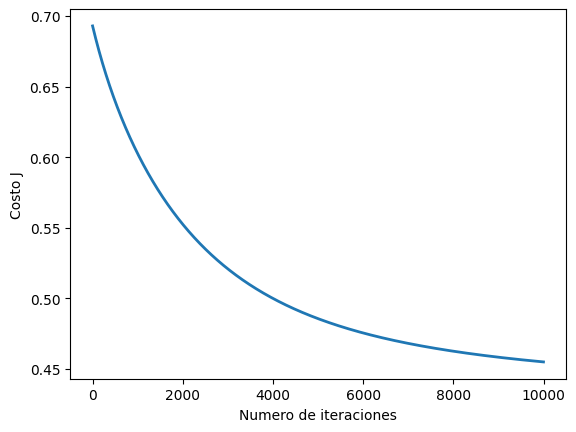

In [204]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta1 = np.zeros(25)
theta1, J_history = descensoGradiente(theta1, X_ready, y2_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta1)))

In [205]:
y_pred1 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred1.append(sigmoid(np.dot(i, theta1)))

y_pred1 = np.array(y_pred1)
y_pred1

array([0.32003179, 0.26391524, 0.27322065, ..., 0.28752116, 0.22023962,
       0.32855673])

In [206]:
umbral1 = (y_pred1 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral1

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
y2_test = y2_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y2_test

array([0, 0, 1, ..., 1, 0, 0])

In [208]:
result1 = pd.DataFrame({'y_test': y2_test, 'prediccion': umbral1})

# Mostrar el DataFrame
result1

,y_test,prediccion
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5843,0,0
5844,0,0
5845,1,0
5846,0,0


In [209]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y2_test, umbral1)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.89%


##Hacemos la prueba con y3_train

In [210]:
y3_train = y3_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.18946336e+00 -2.34515329e-02  5.33520710e-02 -6.83062926e-02
  1.69802338e-02  2.55666556e-02 -3.59707992e-03 -4.86670485e-02
 -1.86998678e-02 -5.76791190e-02 -1.08864304e-01  6.06372936e-02
  6.80143621e-02 -1.83158950e-02 -1.72208724e-01  3.21344684e-01
  4.38217728e-02 -5.73165299e-02  3.71858943e-02 -7.14172599e-03
 -3.80724472e-04 -1.88785605e-01 -6.64395881e-03  2.33912079e-04
  1.07828850e-02]


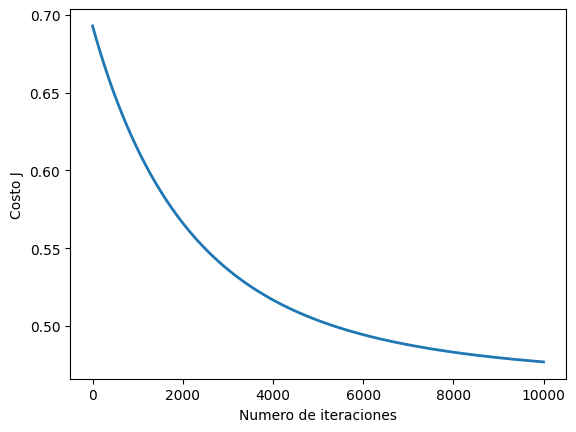

In [211]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta2 = np.zeros(25)
theta2, J_history = descensoGradiente(theta2, X_ready, y3_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta2)))

In [212]:
y_pred2 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred2.append(sigmoid(np.dot(i, theta2)))

y_pred2 = np.array(y_pred2)
y_pred2

array([0.44446712, 0.3804373 , 0.12455704, ..., 0.28777067, 0.19629653,
       0.20429091])

In [213]:
umbral2 = (y_pred2 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral2

array([0, 0, 0, ..., 0, 0, 0])

In [214]:
y3_test = y3_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y3_test

array([1, 1, 0, ..., 0, 0, 0])

In [215]:
result2 = pd.DataFrame({'y_test': y3_test, 'prediccion': umbral2})

# Mostrar el DataFrame
result2

,y_test,prediccion
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
5843,0,0
5844,0,0
5845,0,0
5846,0,0


In [216]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y3_test, umbral2)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.27%


##Hacemos la prueba con y4_train

In [217]:
y4_train = y4_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.20820388  0.08021036  0.04386486 -0.00135084  0.03888177  0.10967183
 -0.03406124 -0.05530879  0.08952449  0.07055058 -0.02883076  0.05091616
 -0.07962604 -0.00704036 -0.29533954  0.2924447   0.05644322  0.06911239
  0.04057198 -0.00942655 -0.00329617 -0.00734904 -0.00897761 -0.01288178
 -0.01593776]


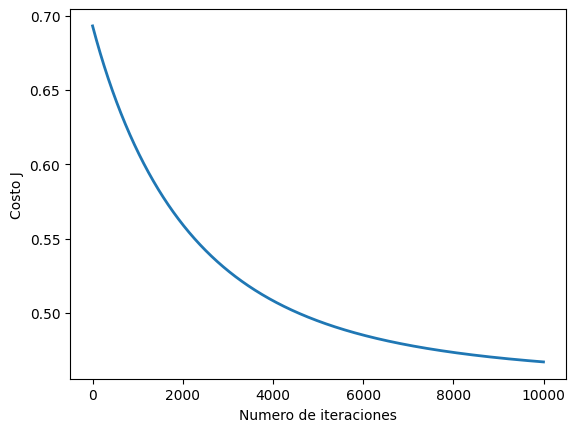

In [218]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta3 = np.zeros(25)
theta3, J_history = descensoGradiente(theta3, X_ready, y4_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta3)))

In [219]:
y_pred3 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred3.append(sigmoid(np.dot(i, theta3)))

y_pred3 = np.array(y_pred3)
y_pred3

array([0.35766717, 0.31515831, 0.13751951, ..., 0.26145899, 0.20849959,
       0.12470465])

In [220]:
umbral3 = (y_pred3 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral3

array([0, 0, 0, ..., 0, 0, 0])

In [221]:
y4_test = y4_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y4_test

array([0, 0, 0, ..., 0, 1, 0])

In [222]:
result3 = pd.DataFrame({'y_test': y4_test, 'prediccion': umbral3})

# Mostrar el DataFrame
result3

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5843,0,0
5844,1,0
5845,0,0
5846,1,0


In [223]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y4_test, umbral3)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.70%


##Hacemos la prueba con y5_train

In [224]:
y5_train = y5_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.41532871e+00 -1.28823828e-02  1.02549462e-01  2.97136430e-01
  1.51030259e-02  3.75116594e-02  7.38610714e-02  2.00827947e-01
  8.06275620e-02  3.94250147e-01  2.84120277e-01  8.92533064e-02
 -1.95910558e-01  9.93974427e-02  3.08507415e-02  1.94383423e-01
 -1.25138043e-01  2.79324824e-01 -2.70309281e-02  1.52481219e-02
  6.67601603e-04  8.59417972e-01  1.59841029e-02 -3.49014486e-02
  4.23962739e-03]


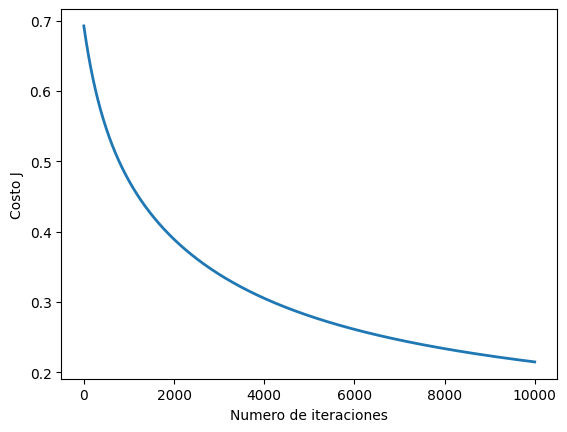

In [225]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta4 = np.zeros(25)
theta4, J_history = descensoGradiente(theta4, X_ready, y5_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta4)))

In [226]:
y_pred4 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred4.append(sigmoid(np.dot(i, theta4)))

y_pred4 = np.array(y_pred4)
y_pred4

array([0.06041698, 0.04325592, 0.19224208, ..., 0.10415427, 0.18066525,
       0.04875831])

In [227]:
umbral4 = (y_pred4 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral4

array([0, 0, 0, ..., 0, 0, 0])

In [228]:
y5_test = y5_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y5_test

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
result4 = pd.DataFrame({'y_test': y5_test, 'prediccion': umbral4})

# Mostrar el DataFrame
result4

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
5843,0,0
5844,0,0
5845,0,0
5846,0,0


In [230]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y5_test, umbral4)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 94.03%
